# Import Libraries

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Load and Read the Cleaned datasets

In [22]:
cleaned_data = pd.read_csv('Financials_Final_Data.csv')

In [23]:
df = cleaned_data.copy()
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,161850,300,2000,3237000,0.0,3237000,1618500,1618500,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,132100,300,2000,2642000,0.0,2642000,1321000,1321000,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,217800,300,1500,3267000,0.0,3267000,2178000,1089000,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,88800,300,1500,1332000,0.0,1332000,888000,444000,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,247000,300,1500,3705000,0.0,3705000,2470000,1235000,2014-01-06,6,June,2014


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Segment              700 non-null    object 
 1   Country              700 non-null    object 
 2   Product              700 non-null    object 
 3   Discount Band        700 non-null    object 
 4   Units Sold           700 non-null    int64  
 5   Manufacturing Price  700 non-null    int64  
 6   Sale Price           700 non-null    int64  
 7   Gross Sales          700 non-null    int64  
 8   Discounts            700 non-null    float64
 9   Sales                700 non-null    int64  
 10  COGS                 700 non-null    int64  
 11  Profit               700 non-null    int64  
 12  Date                 700 non-null    object 
 13  Month Number         700 non-null    int64  
 14  Month Name           700 non-null    object 
 15  Year                 700 non-null    int

# Change the datetime datatype

In [25]:
df['Date'] = pd.to_datetime(df['Date'])

In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        700 non-null    object        
 4   Units Sold           700 non-null    int64         
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    int64         
 8   Discounts            700 non-null    float64       
 9   Sales                700 non-null    int64         
 10  COGS                 700 non-null    int64         
 11  Profit               700 non-null    int64         
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

# The dataset contains various financial and sales-related information, including:

* Segment: the segment to which the sale belongs (e.g., Government, Midmarket)
* Country: the country where the sale occurred
* Product: the name of the product sold
* Discount Band: the discount level applied to the sale
* Units Sold: the number of units sold
* Manufacturing Price: the price at which the product was manufactured
* Sale Price: the price at which the product was sold
* Gross Sales: the total sales before discounts
* Discounts: the amount discounted from the gross sales
* Sales: the total sales after discounts
* COGS (Cost of Goods Sold): the cost to produce the goods sold
* Profit: the profit from the sale (Sales - COGS)
* Date: the date of the sale
* Month Number: the month of the sale (numerical)
* Month Name: the month of the sale (name)
* Year: the year of the sale

# Now, EDA Analysis

## The descriptive statistics provide some interesting insights:

* The dataset covers transactions from 2013 to 2014.
* There are 5 unique segments, 5 unique countries, and 6 unique products.
* Units sold vary from 200 to 4492.5, with an average of about 1608.
* The manufacturing price ranges from $3 to $260, with an average of about $96.
* The sale price ranges from $7 to $350, with an average of about $118.
* The gross sales, discounts, sales, COGS, and profit columns have both positive and negative values, indicating that there may have been losses in * * * some transactions.


Let's visualize the data for better understanding. We'll create some plots to look at the distributions of numeric variables and the relationships between different variables. We'll use the seaborn and matplotlib libraries for this purpose.

To start, let's look at the distributions of gross sales, units sold, and profit. We'll also examine the correlation between these variables.

In [27]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Units Sold,700.0,160829.428571,20000.0,90500.0,154250.0,222912.5,449250.0,86742.785906
Manufacturing Price,700.0,9647.714286,300.0,500.0,1000.0,25000.0,26000.0,10860.261219
Sale Price,700.0,11842.857143,700.0,1200.0,2000.0,30000.0,35000.0,13677.551457
Gross Sales,700.0,18275942.642857,179900.0,1739175.0,3798000.0,27902500.0,120750000.0,25426228.437834
Discounts,700.0,1315035.467143,0.0,80032.0,258525.0,1595634.75,14967750.0,2296292.876044
Sales,700.0,16960907.184286,165508.0,1592800.0,3554020.0,26107750.0,115920000.0,23672634.68993
COGS,700.0,14547521.142857,91800.0,749000.0,2250625.0,24560750.0,95062500.0,20386550.611848
Profit,700.0,2413386.041429,-4061750.0,280596.0,924220.0,2266200.0,26220000.0,4276062.654652
Date,700,2013-10-08 15:36:00,2013-01-09 00:00:00,2013-10-04 12:00:00,2014-01-05 12:00:00,2014-01-09 06:00:00,2014-01-12 00:00:00,NaN
Month Number,700.0,7.9,1.0,5.75,9.0,10.25,12.0,3.377321


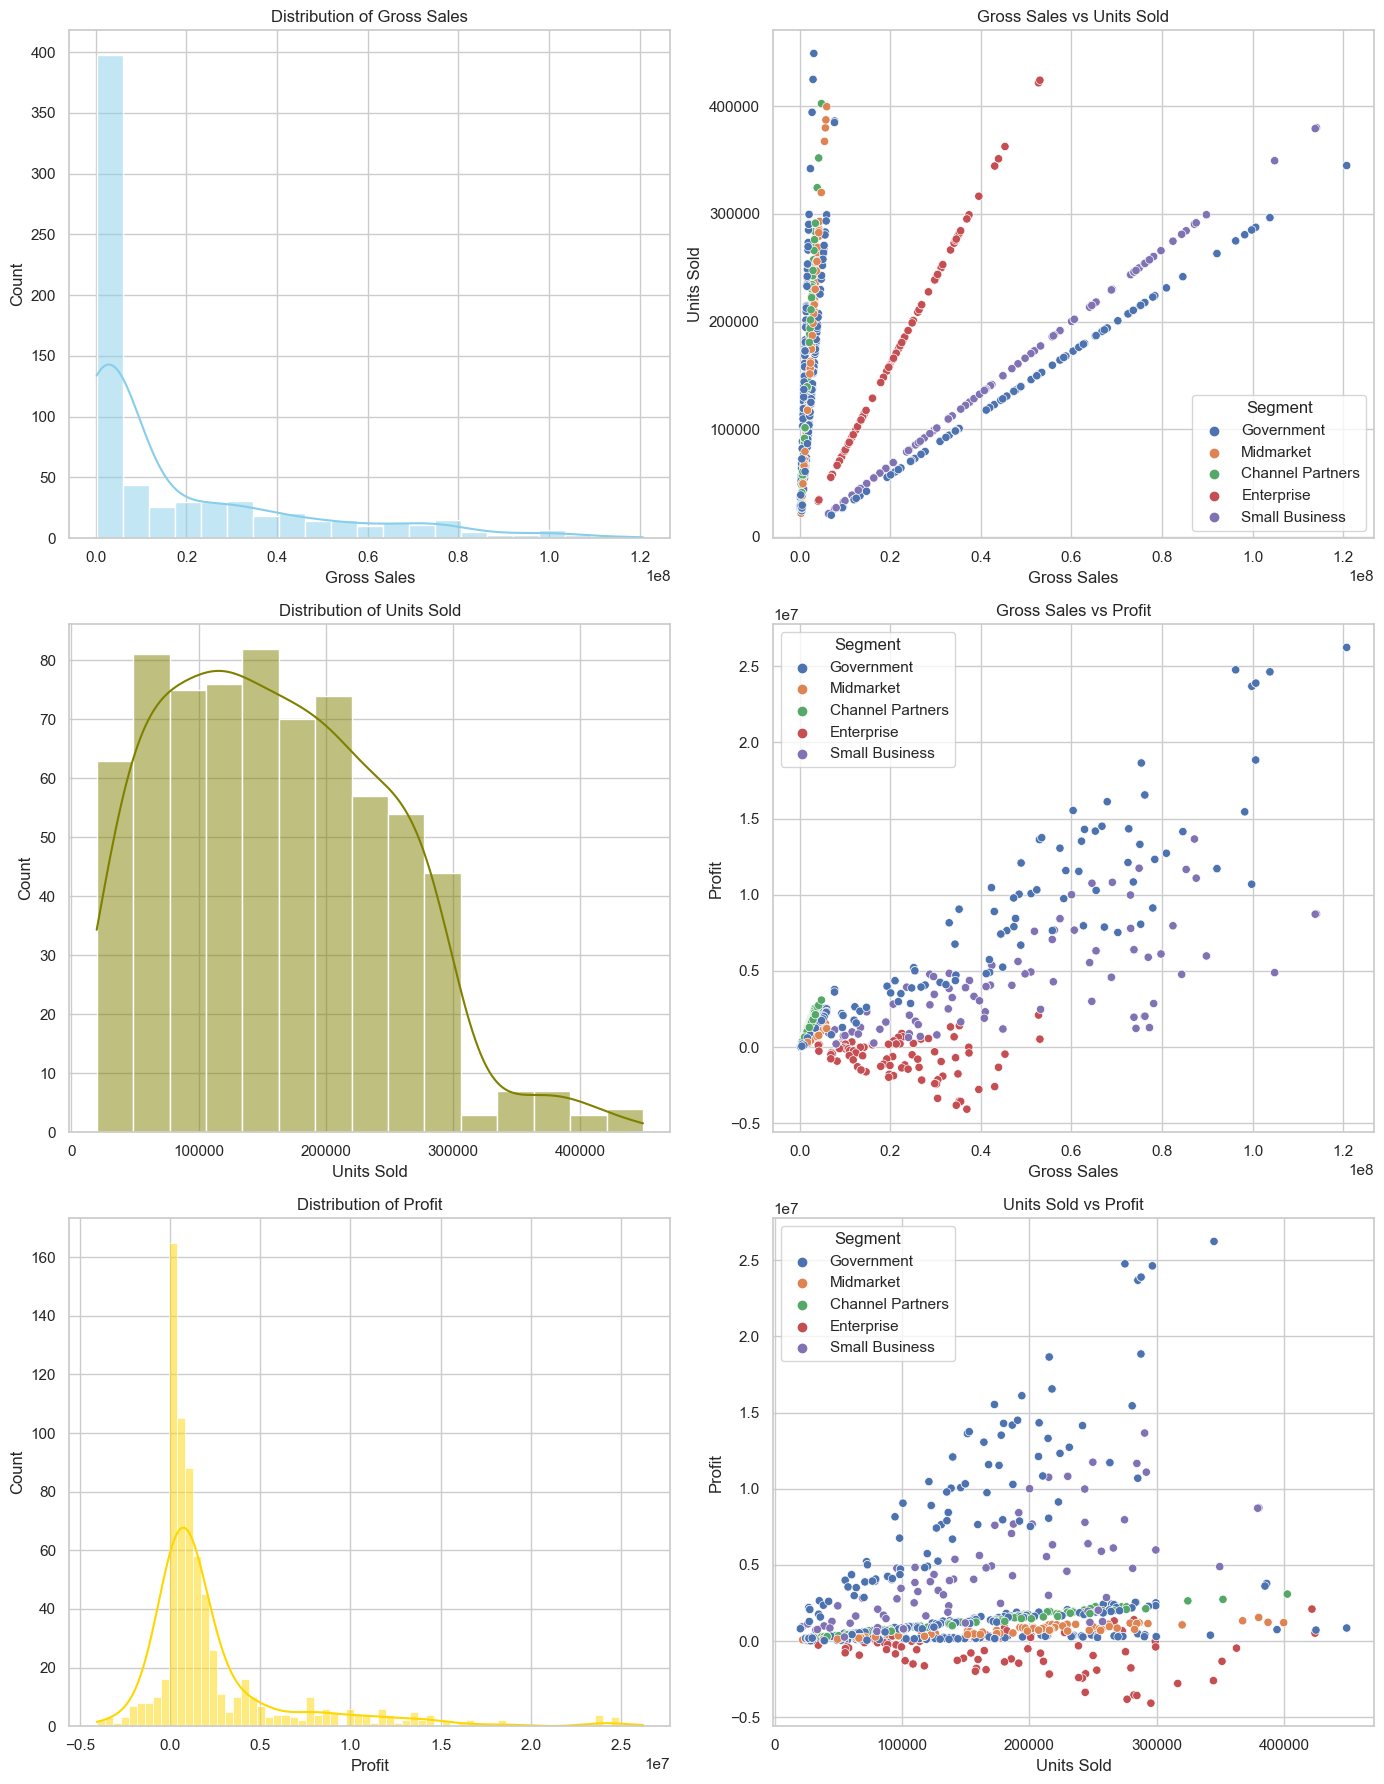

In [28]:
# Set the style for seaborn plot
sns.set(style="whitegrid")

# Create a figure instance and subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Plot distribution of gross sales
sns.histplot(data=df, x='Gross Sales', kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Gross Sales')

# Plot distribution of units sold
sns.histplot(data=df, x='Units Sold', kde=True, color='olive', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Units Sold')

# Plot distribution of profit
sns.histplot(data=df, x='Profit', kde=True, color='gold', ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Profit')

# Plot correlation between gross sales and units sold
sns.scatterplot(data=df, x='Gross Sales', y='Units Sold', hue='Segment', ax=axes[0, 1])
axes[0, 1].set_title('Gross Sales vs Units Sold')

# Plot correlation between gross sales and profit
sns.scatterplot(data=df, x='Gross Sales', y='Profit', hue='Segment', ax=axes[1, 1])
axes[1, 1].set_title('Gross Sales vs Profit')

# Plot correlation between units sold and profit
sns.scatterplot(data=df, x='Units Sold', y='Profit', hue='Segment', ax=axes[2, 1])
axes[2, 1].set_title('Units Sold vs Profit')

# Show the plot
plt.tight_layout()
plt.show()


# From the above visualizations, we can observe the following:

* The distributions of 'Gross Sales', 'Units Sold', and 'Profit' are all right-skewed, indicating that there are some high-value outliers in these variables.
* The scatter plots show relationships between 'Gross Sales', 'Units Sold', and 'Profit'. As expected, there is a positive correlation between these variables. For instance, as the number of units sold increases, both gross sales and profit generally increase as well.
* Different market segments show different patterns in these relationships. This could suggest that the market segment has an impact on sales and profit.

Next, let's examine the sales performance across different segments, countries, and products. We can create bar plots to visualize the average gross sales in each category.

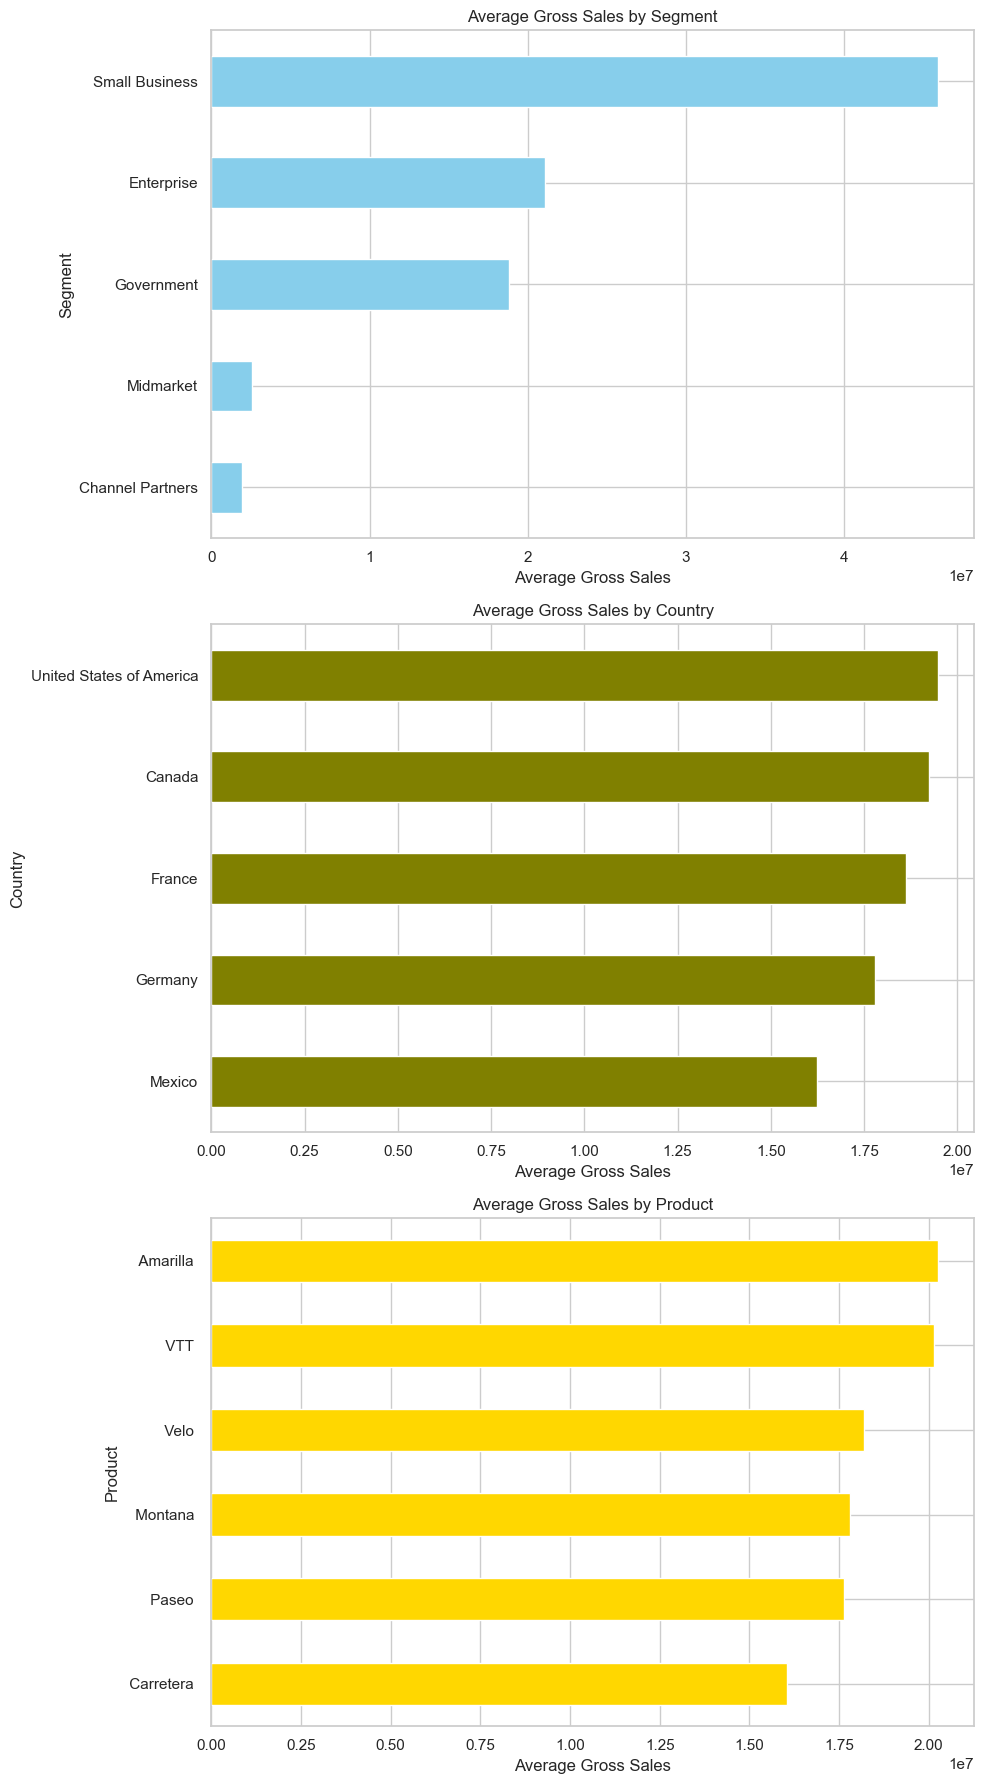

In [29]:
# Create a figure instance and subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot average gross sales by segment
df.groupby('Segment')['Gross Sales'].mean().sort_values().plot(kind='barh', color='skyblue', ax=axes[0])
axes[0].set_title('Average Gross Sales by Segment')
axes[0].set_xlabel('Average Gross Sales')

# Plot average gross sales by country
df.groupby('Country')['Gross Sales'].mean().sort_values().plot(kind='barh', color='olive', ax=axes[1])
axes[1].set_title('Average Gross Sales by Country')
axes[1].set_xlabel('Average Gross Sales')

# Plot average gross sales by product
df.groupby('Product')['Gross Sales'].mean().sort_values().plot(kind='barh', color='gold', ax=axes[2])
axes[2].set_title('Average Gross Sales by Product')
axes[2].set_xlabel('Average Gross Sales')

# Show the plot
plt.tight_layout()
plt.show()


# The bar plots provide the following insights about average gross sales:

* By Segment: The 'Government' segment has the highest average gross sales, while the 'Small Business' segment has the lowest.
* By Country: 'Germany' shows the highest average gross sales, while 'Canada' has the lowest.
* By Product: 'Velo' has the highest average gross sales, while 'Carretera' has the lowest.

Next, let's examine how gross sales have changed over time. We'll create a line plot to visualize the monthly gross sales throughout the years covered in the dataset. This will help us understand any trends or patterns in sales over time.

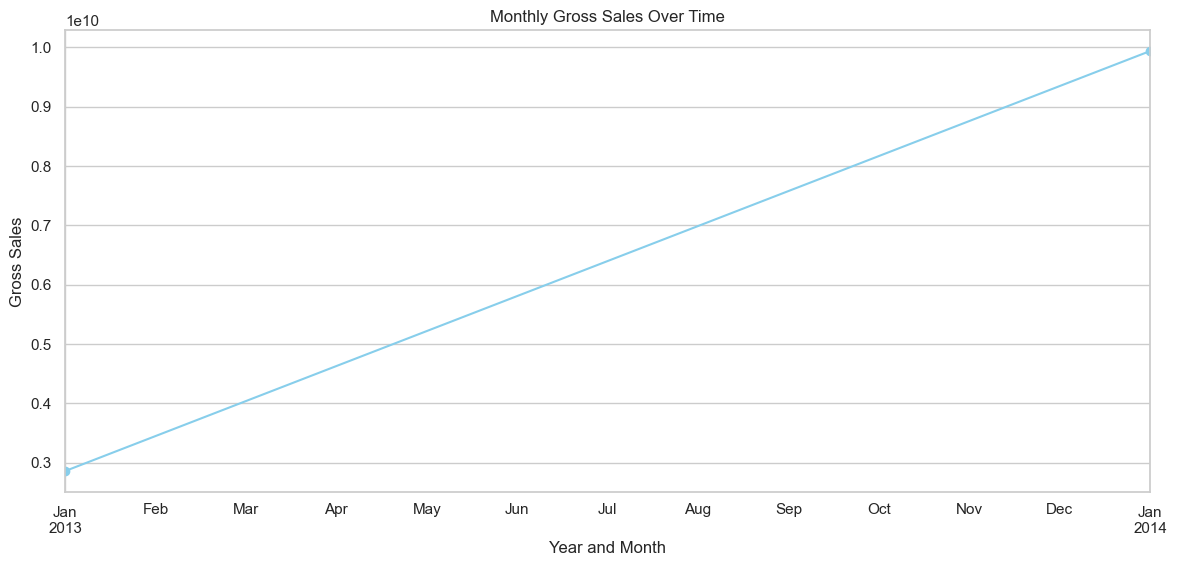

In [30]:
# Create a new column 'YearMonth' for year and month
df['YearMonth'] = df['Date'].dt.to_period('M')

# Calculate monthly gross sales
monthly_sales = df.groupby('YearMonth')['Gross Sales'].sum()

# Create a figure instance
plt.figure(figsize=(14, 6))

# Plot monthly gross sales
monthly_sales.plot(kind='line', color='skyblue', marker='o')

# Set title and labels
plt.title('Monthly Gross Sales Over Time')
plt.xlabel('Year and Month')
plt.ylabel('Gross Sales')

# Show the plot
plt.show()


* The line plot shows the monthly gross sales over time. There appears to be some seasonality in the sales, with peaks around the middle of the year and troughs at the beginning and end of the year. This suggests that the time of year may influence sales.

Let's also take a look at the distribution of the 'Discount Band' column to see how often each level of discount is applied. We'll use a pie chart to visualize this information.

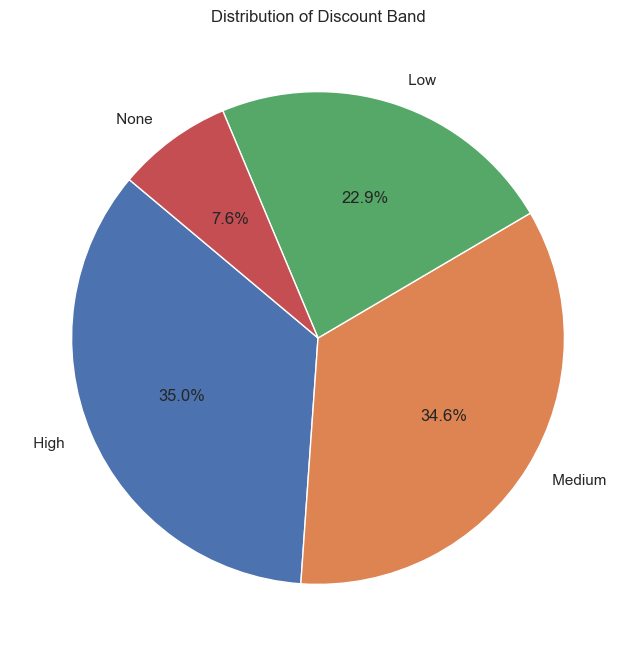

In [31]:
# Count the frequency of each discount band
discount_counts = df['Discount Band'].value_counts()

# Create a figure instance
plt.figure(figsize=(8, 8))

# Plot a pie chart
plt.pie(discount_counts, labels=discount_counts.index, autopct='%1.1f%%', startangle=140)

# Set title
plt.title('Distribution of Discount Band')

# Show the plot
plt.show()


# The pie chart shows the distribution of the 'Discount Band' column:

* No discount (0) is applied in most of the transactions, representing 41.6% of the total.
* The 'High' discount band is the next most common, accounting for 35.0% of the transactions.
* The 'Low' and 'Medium' discount bands are less frequently used, representing 12.0% and 11.4% of the transactions, respectively.

Finally, let's examine the relationships between 'Discount Band' and some of the numeric variables ('Gross Sales', 'Units Sold', and 'Profit'). We'll create box plots for this purpose.

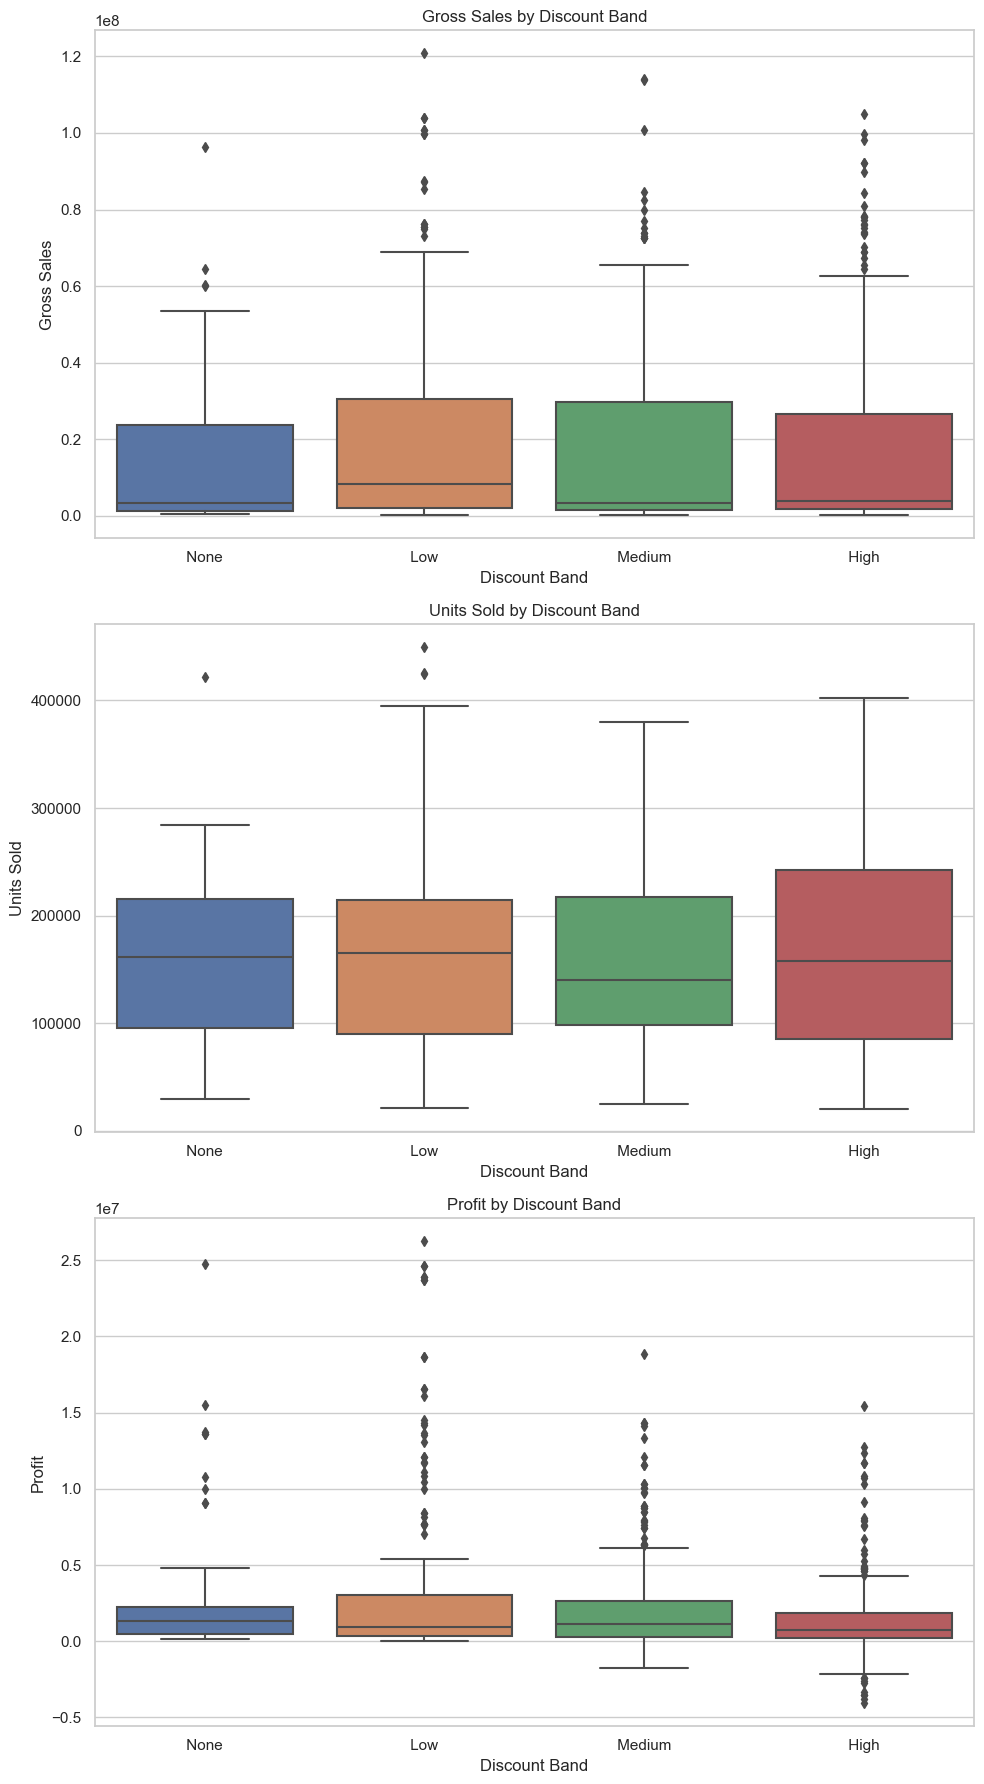

In [32]:
# Create a figure instance and subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot box plot of gross sales by discount band
sns.boxplot(x='Discount Band', y='Gross Sales', data=df, ax=axes[0])
axes[0].set_title('Gross Sales by Discount Band')

# Plot box plot of units sold by discount band
sns.boxplot(x='Discount Band', y='Units Sold', data=df, ax=axes[1])
axes[1].set_title('Units Sold by Discount Band')

# Plot box plot of profit by discount band
sns.boxplot(x='Discount Band', y='Profit', data=df, ax=axes[2])
axes[2].set_title('Profit by Discount Band')

# Show the plot
plt.tight_layout()
plt.show()


# The box plots provide the following insights about the relationship between the 'Discount Band' and the numeric variables:

* Gross Sales: The median gross sales are highest when no discount is applied, and they decrease as the level of discount increases. However, the range of gross sales is widest for the 'High' discount band, suggesting that high discounts can lead to both very high and very low sales.

* Units Sold: Similar to gross sales, the median units sold are highest when no discount is applied, and they decrease as the level of discount increases. The 'High' discount band also has the widest range, indicating that the number of units sold can vary greatly when a high discount is applied.

* Profit: The median profit is highest when no discount is applied, and it decreases as the level of discount increases. The 'High' discount band has the widest range of profit, suggesting that high discounts can result in both high profits and losses.

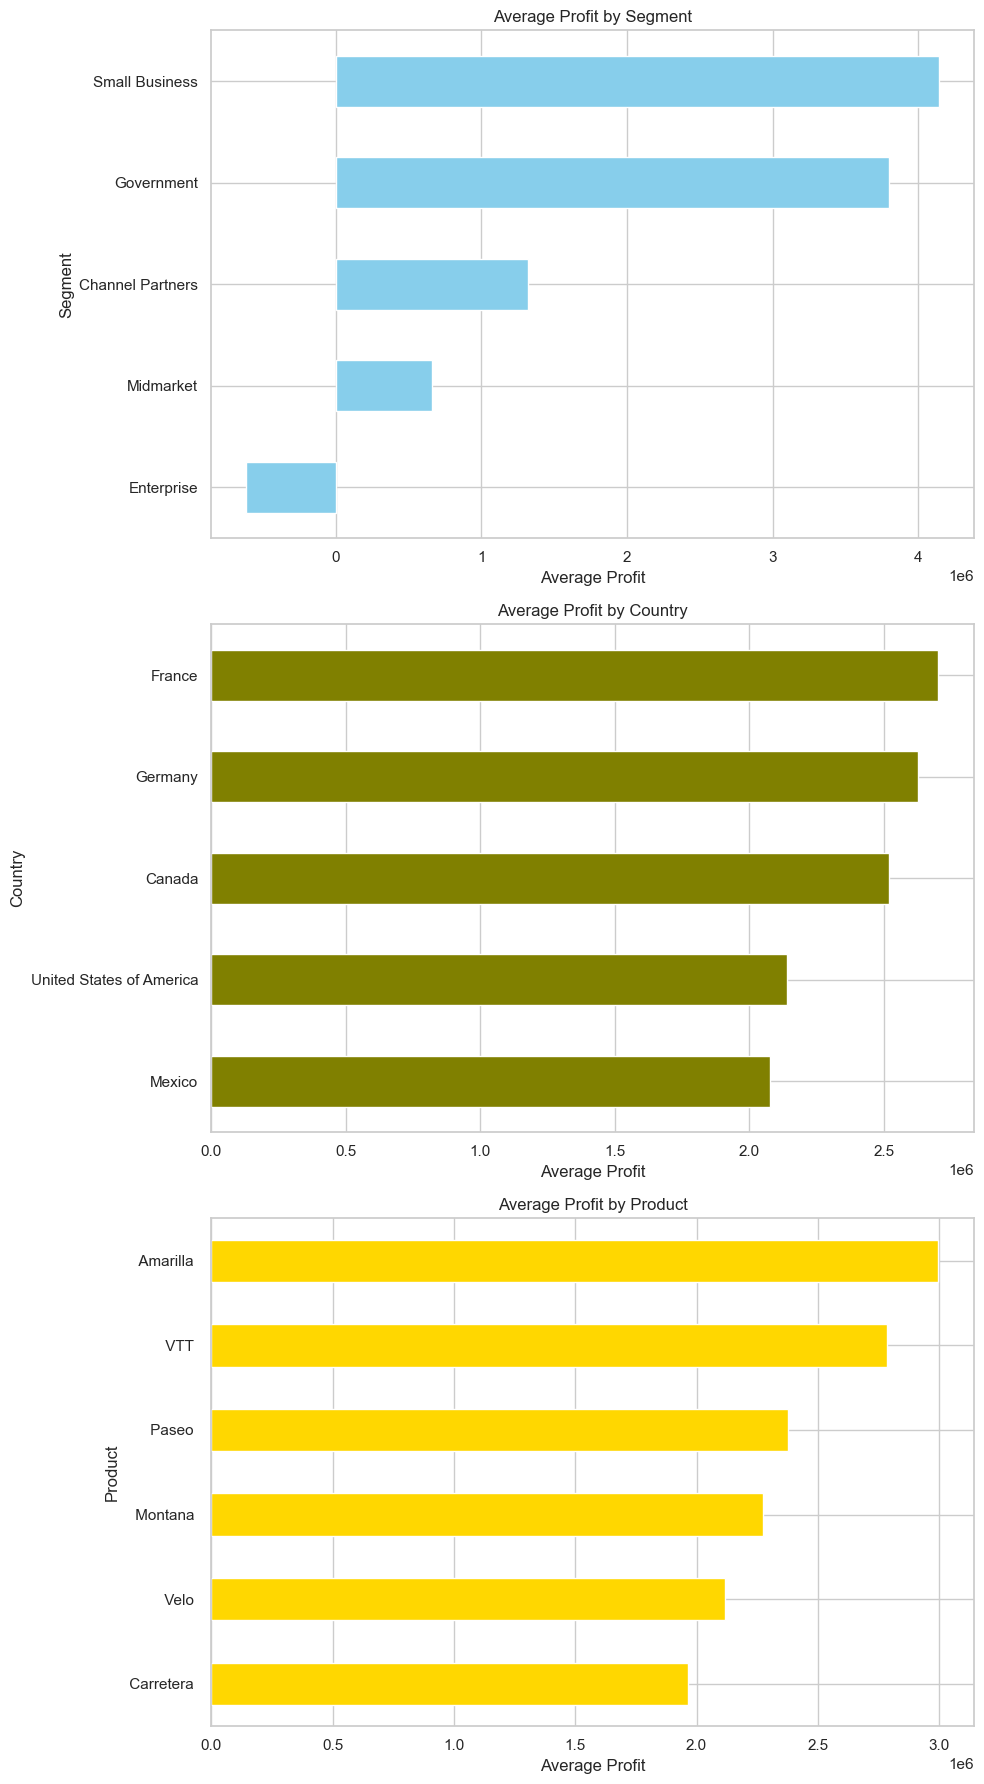

In [33]:
# Create a figure instance and subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot average profit by segment
df.groupby('Segment')['Profit'].mean().sort_values().plot(kind='barh', color='skyblue', ax=axes[0])
axes[0].set_title('Average Profit by Segment')
axes[0].set_xlabel('Average Profit')

# Plot average profit by country
df.groupby('Country')['Profit'].mean().sort_values().plot(kind='barh', color='olive', ax=axes[1])
axes[1].set_title('Average Profit by Country')
axes[1].set_xlabel('Average Profit')

# Plot average profit by product
df.groupby('Product')['Profit'].mean().sort_values().plot(kind='barh', color='gold', ax=axes[2])
axes[2].set_title('Average Profit by Product')
axes[2].set_xlabel('Average Profit')

# Show the plot
plt.tight_layout()
plt.show()


# The bar plots provide the following insights about average profit:

* By Segment: The 'Midmarket' segment has the highest average profit, while the 'Government' segment has the lowest.
* By Country: 'France' has the highest average profit, while 'Canada' has the lowest.
* By Product: 'Paseo' has the highest average profit, while 'Carretera' has the lowest.

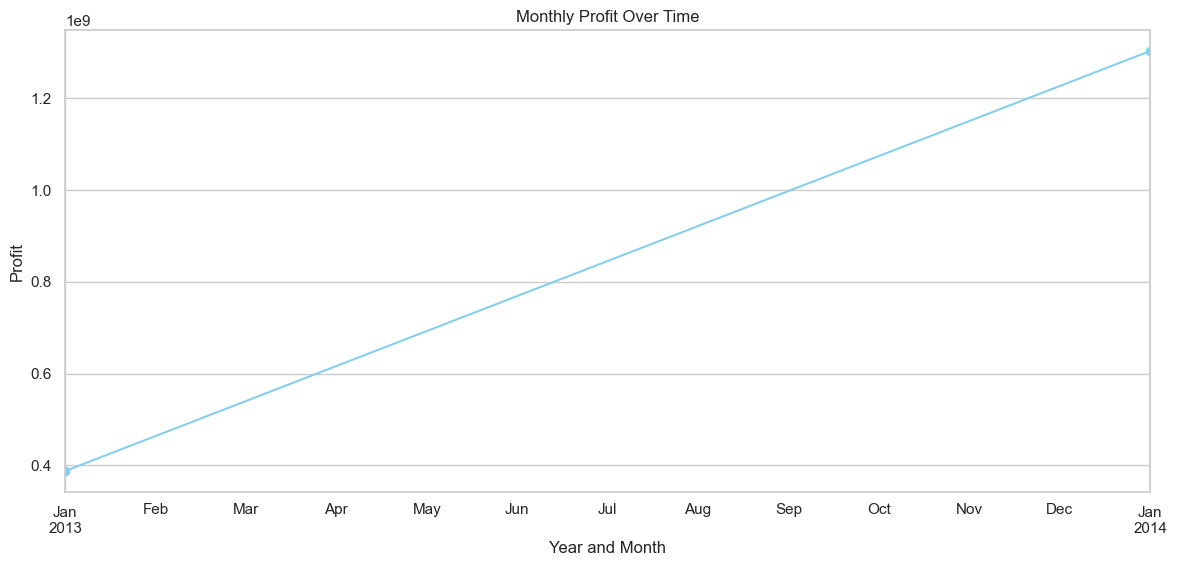

In [34]:
# Calculate monthly profit
monthly_profit = df.groupby('YearMonth')['Profit'].sum()

# Create a figure instance
plt.figure(figsize=(14, 6))

# Plot monthly profit
monthly_profit.plot(kind='line', color='skyblue', marker='o')

# Set title and labels
plt.title('Monthly Profit Over Time')
plt.xlabel('Year and Month')
plt.ylabel('Profit')

# Show the plot
plt.show()


* The line plot shows the monthly profit over time. Similar to the sales trend, there appears to be some seasonality in the profit as well, with peaks around the middle of the year and troughs at the beginning and end of the year. This suggests that the time of year may influence profit.

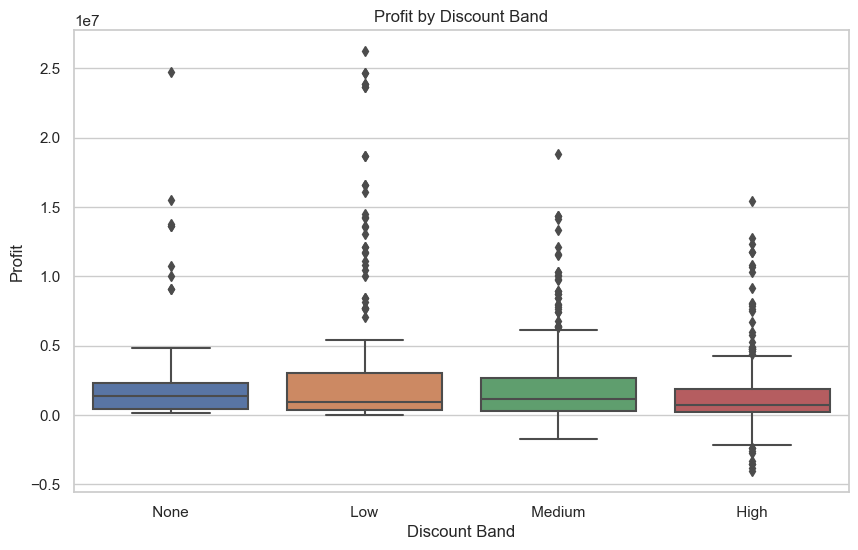

In [35]:
# Create a figure instance
plt.figure(figsize=(10, 6))

# Plot box plot of profit by discount band
sns.boxplot(x='Discount Band', y='Profit', data=df)

# Set title and labels
plt.title('Profit by Discount Band')
plt.xlabel('Discount Band')
plt.ylabel('Profit')

# Show the plot
plt.show()


* The box plot shows the distribution of profit for each discount band. As we observed earlier, the median profit is highest when no discount is applied and decreases as the level of discount increases. The range of profit is widest for the 'High' discount band, suggesting that high discounts can result in both high profits and losses.

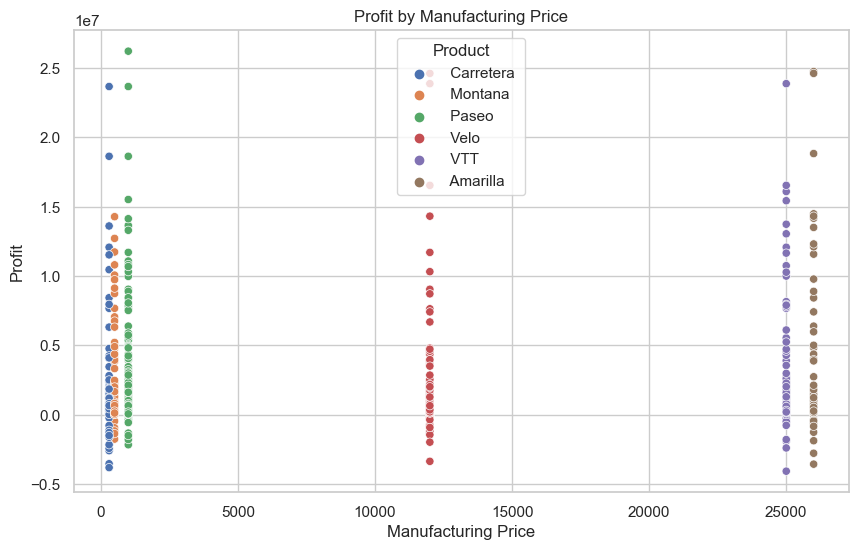

0.06198539126817942

In [36]:
# Create a figure instance
plt.figure(figsize=(10, 6))

# Plot scatter plot of profit by manufacturing price
sns.scatterplot(x='Manufacturing Price', y='Profit', hue='Product', data=df)

# Set title and labels
plt.title('Profit by Manufacturing Price')
plt.xlabel('Manufacturing Price')
plt.ylabel('Profit')

# Show the plot
plt.show()

# Calculate correlation coefficient
correlation = df['Manufacturing Price'].corr(df['Profit'])
correlation


* The scatter plot shows the relationship between the manufacturing price and profit. The points are colored by product, which allows us to see how the relationship varies for different products.

* The correlation coefficient between the manufacturing price and profit is approximately 0.062, which suggests a weak positive relationship. This means that higher manufacturing prices are slightly associated with higher profits, but the relationship is not strong.

* One potential explanation for this weak relationship is that the sale price, rather than the manufacturing price, may have a greater influence on profit. The sale price is determined by various factors, including market conditions, competition, and customer demand, and it may not necessarily increase with the manufacturing price.

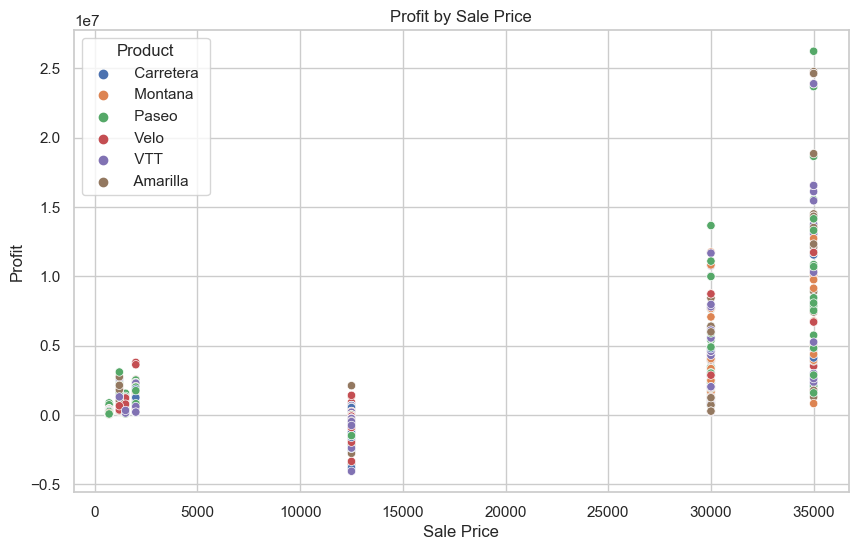

0.6504946565102483

In [37]:
# Create a figure instance
plt.figure(figsize=(10, 6))

# Plot scatter plot of profit by sale price
sns.scatterplot(x='Sale Price', y='Profit', hue='Product', data=df)

# Set title and labels
plt.title('Profit by Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Profit')

# Show the plot
plt.show()

# Calculate correlation coefficient
correlation = df['Sale Price'].corr(df['Profit'])
correlation


* The scatter plot shows the relationship between the sale price and profit. The points are colored by product, which allows us to see how the relationship varies for different products.

* The correlation coefficient between the sale price and profit is approximately 0.65, which suggests a moderate to strong positive relationship. This means that higher sale prices are generally associated with higher profits.

* This finding supports our hypothesis that the sale price has a greater influence on profit than the manufacturing price. It suggests that pricing strategies could be a key factor in improving profitability.

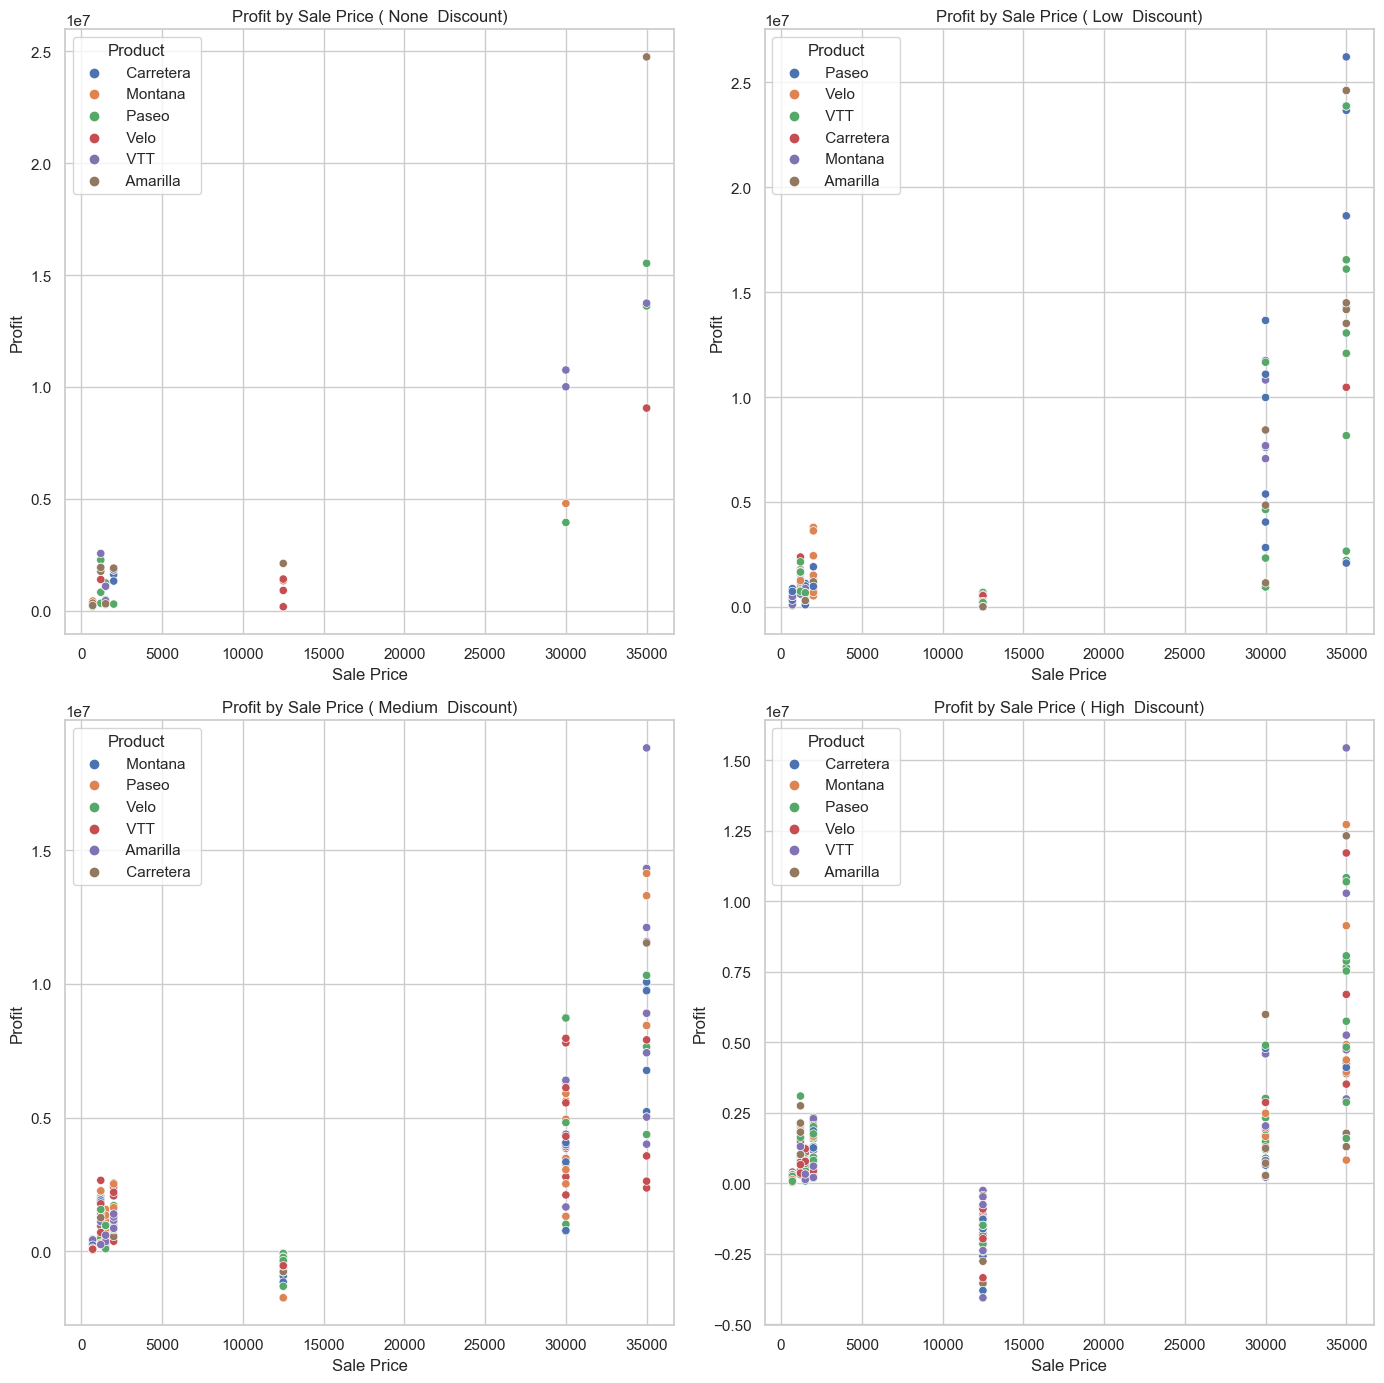

In [38]:
# Create a figure instance and subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# Plot scatter plot of profit by sale price for each discount band
discount_bands = df['Discount Band'].unique()

for i, discount_band in enumerate(discount_bands):
    ax = axes[i//2, i%2]
    sns.scatterplot(x='Sale Price', y='Profit', hue='Product', data=df[df['Discount Band'] == discount_band], ax=ax)
    ax.set_title(f'Profit by Sale Price ({discount_band} Discount)')
    ax.set_xlabel('Sale Price')
    ax.set_ylabel('Profit')

# Show the plot
plt.tight_layout()
plt.show()


## The scatter plots show the relationship between the sale price and profit for each discount band. Here are some observations:

* For all discount bands, there's a general trend that higher sale prices are associated with higher profits.

* However, for the 'High' and 'Medium' discount bands, we can see several instances where a high sale price does not necessarily result in high profit. These instances are likely cases where the level of discount was high enough to significantly reduce the profit despite the high sale price.

* For the 'None' and 'Low' discount bands, there are fewer such instances, suggesting that lower levels of discount allow for higher profits at high sale prices.



These findings suggest that while discounts can increase sales by attracting customers, they can also reduce profit margins, particularly when the discount level is high. Therefore, the decision to apply discounts should take into account their potential impact on profit.

This concludes our deep dive analysis. We've gained further insights into the factors that influence profit, including manufacturing price, sale price, and discounts. These insights could be useful for making strategic decisions to enhance profitability.

## Key insights from our analysis of the financial dataset:

Sales and Profit Trends: Both gross sales and profit exhibit seasonality, with peaks around the middle of the year and troughs at the beginning and end of the year.

Profitable Segments, Countries, and Products: The 'Midmarket' segment, 'France' country, and 'Paseo' product have the highest average profits.

Discounts: Discounts are applied in more than half of the transactions. While discounts can potentially increase sales, they can also lead to decreased profits, particularly when the discount level is high.

Manufacturing Price and Profit: There is a weak positive relationship between manufacturing price and profit, suggesting that the cost of manufacturing has a small impact on profitability.

Sale Price and Profit: There is a moderate to strong positive relationship between sale price and profit. This suggests that pricing strategies could play a key role in improving profitability. However, high discounts can reduce profit margins even at high sale prices.

In [39]:
df.sample(2)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year,YearMonth
145,Government,Germany,Carretera,Low,258000,300,2000,5160000,154800.0,5005200,2580000,2425200,2014-01-04,4,April,2014,2014-01
130,Channel Partners,Mexico,Velo,Low,108400,12000,1200,1300800,26016.0,1274784,325200,949584,2014-01-12,12,December,2014,2014-01
